# EDA

# Exploratory Data Analysis
This will show us how we can do EDA using python

## Three Important steps to keep in mind
1. Understand the data
2. clean the data
3. Find a relationship between the data 


In [1]:
#Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
kashti = sns.load_dataset('titanic')
kashti.to_csv('kashti.csv')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
ks = kashti

In [5]:
# WHat is there in dataset (overview)
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
ks.shape

(891, 15)

In [8]:
ks.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [24]:
#column names are
cks=ks.columns
cks

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
ks['sex'].unique()

array(['male', 'female'], dtype=object)

In [26]:
ks[cks].nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [28]:
uniq_Values = (ks['survived'].append(ks['pclass']).append(ks['sex']).append(ks['age']).append(ks['sibsp']).append(ks['parch']).append(ks['embarked'])
.append(ks['class']).append(ks['who']).append(ks['adult_male']).append(ks['deck']).append(ks['embark_town']).append(ks['alive']).append(ks['alone'])).unique()
uniq_Values

array([0, 1, 3, 2, 'male', 'female', 22.0, 38.0, 26.0, 35.0, nan, 54.0,
       27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0, 15.0, 28.0,
       8.0, 19.0, 40.0, 66.0, 42.0, 21.0, 18.0, 7.0, 49.0, 29.0, 65.0,
       28.5, 5.0, 11.0, 45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0,
       23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5, 70.5, 32.5, 12.0,
       9.0, 36.5, 51.0, 55.5, 40.5, 44.0, 61.0, 56.0, 50.0, 36.0, 45.5,
       20.5, 62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0, 10.0, 64.0,
       13.0, 48.0, 0.75, 53.0, 57.0, 80.0, 70.0, 24.5, 6.0, 0.67, 30.5,
       0.42, 34.5, 74.0, 'S', 'C', 'Q', 'Third', 'First', 'Second', 'man',
       'woman', 'child', 'E', 'G', 'D', 'A', 'B', 'F', 'Southampton',
       'Cherbourg', 'Queenstown', 'no', 'yes'], dtype=object)

# cleaning and filtering the data


In [30]:
# Find the missing values
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
#removing or cleaning
clean_ks = ks.drop(['deck'], axis=1)
clean_ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [34]:
clean_ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
clean_ks.shape

(891, 14)

In [36]:
891-177

714

In [39]:
clean_ks=clean_ks.dropna()

In [40]:
clean_ks.shape

(712, 14)

In [41]:
clean_ks.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [42]:
clean_ks.value_counts()

survived  pclass  sex   age   sibsp  parch  fare     embarked  class   who  adult_male  embark_town  alive  alone
0         2       male  25.0  0      0      13.0000  S         Second  man  True        Southampton  no     True     3
          3       male  17.0  0      0      8.6625   S         Third   man  True        Southampton  no     True     3
                        19.0  0      0      7.8958   S         Third   man  True        Southampton  no     True     3
          2       male  23.0  0      0      13.0000  S         Second  man  True        Southampton  no     True     3
                        30.0  0      0      13.0000  S         Second  man  True        Southampton  no     True     3
                                                                                                                    ..
          3       male  18.0  0      0      7.7500   S         Third   man  True        Southampton  no     True     1
                                            7.7750   

In [44]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
clean_ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [47]:
clean_ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:ylabel='age'>

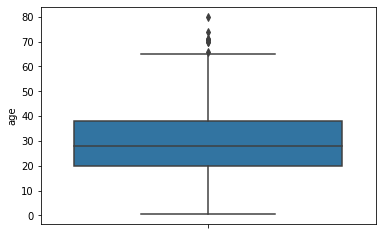

In [49]:
sns.boxplot(y='age', data=clean_ks)

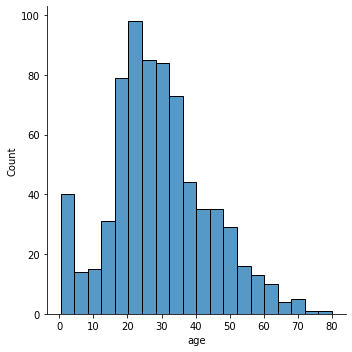

In [51]:
sns.displot(clean_ks['age'])

C:\Users\LAPTOP WALA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LAPTOP WALA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

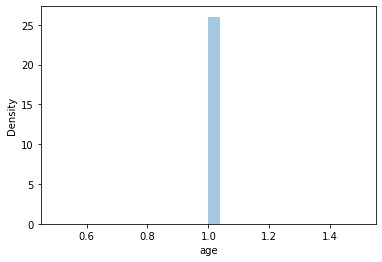

In [90]:
sns.distplot(clean_ks['age'])


In [92]:
#log_transformation
clean_ks['fare_log']=np.log(clean_ks['fare'])
clean_ks.head()

C:\Users\LAPTOP WALA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,True,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,True,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,True,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,True,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,True,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


C:\Users\LAPTOP WALA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_log'>

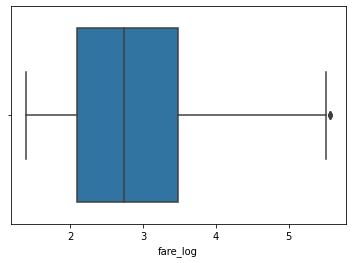

In [93]:
sns.boxplot(clean_ks['fare_log'])

In [53]:
#outliers removal
clean_ks['age'].mean()

29.64209269662921

In [66]:
clean_ks = clean_ks[clean_ks['age'] < 68]
clean_ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,True,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,True,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,True,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,True,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,True,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [61]:
clean_ks.shape

(712, 14)

In [63]:
clean_ks['age'].mean()

1.0

In [68]:
clean_ks = clean_ks[clean_ks['fare'] < 300]
clean_ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,True,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,True,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,True,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,True,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,True,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:ylabel='fare'>

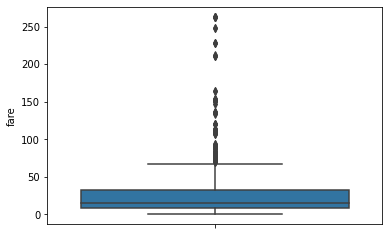

In [70]:
sns.boxplot(y='fare', data=clean_ks)

C:\Users\LAPTOP WALA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

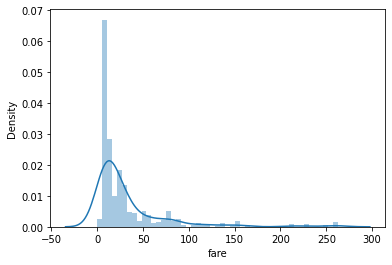

In [72]:
sns.distplot(clean_ks['fare'])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>]],
      dtype=object)

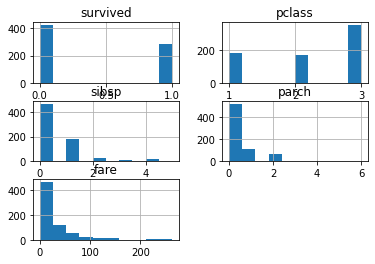

In [73]:
clean_ks.hist()

<AxesSubplot:>

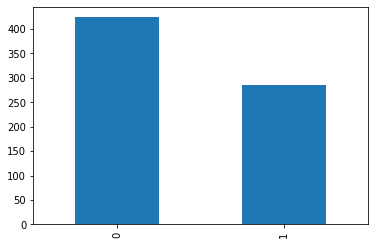

In [74]:
pd.value_counts(clean_ks['survived']).plot.bar()

sex     class 
female  First     AxesSubplot(0.125,0.125;0.775x0.755)
        Second    AxesSubplot(0.125,0.125;0.775x0.755)
        Third     AxesSubplot(0.125,0.125;0.775x0.755)
male    First     AxesSubplot(0.125,0.125;0.775x0.755)
        Second    AxesSubplot(0.125,0.125;0.775x0.755)
        Third     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

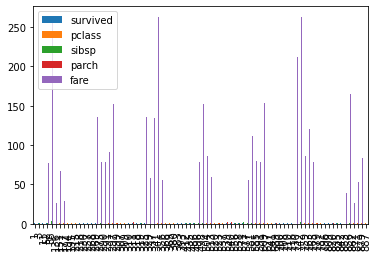

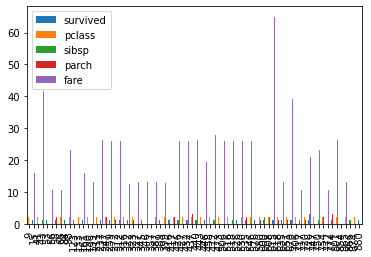

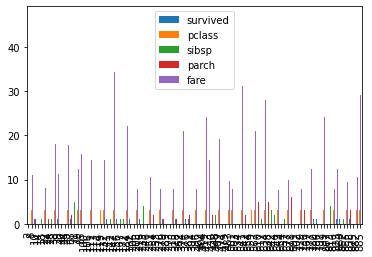

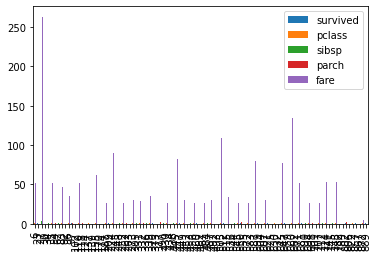

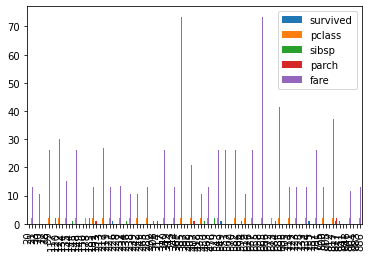

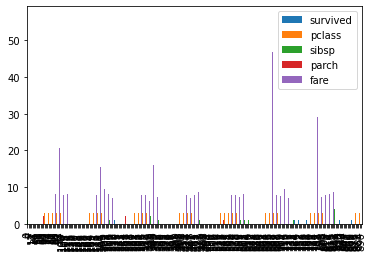

In [75]:
clean_ks.groupby(['sex', 'class']).plot.bar()

# Relationship

In [77]:
core_clean_ks=clean_ks.corr()

<AxesSubplot:>

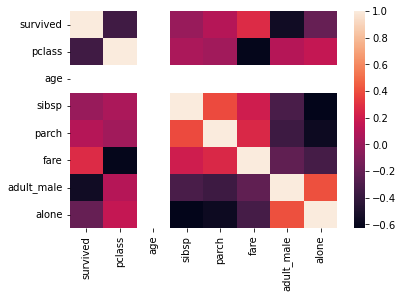

In [78]:
sns.heatmap(core_clean_ks)

<AxesSubplot:>

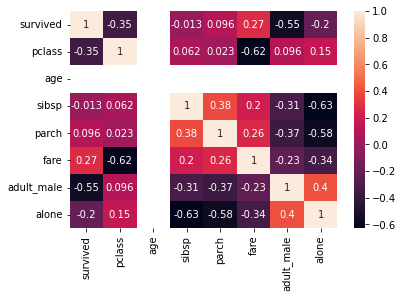

In [79]:
sns.heatmap(core_clean_ks, annot=True)

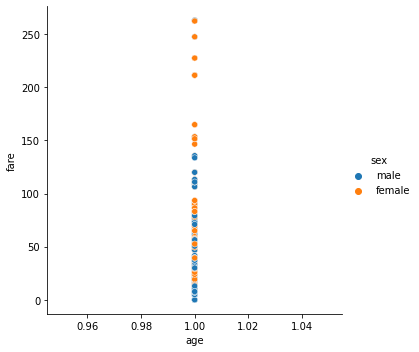

In [86]:
sns.relplot(x ='age', y='fare', hue='sex', data=clean_ks)

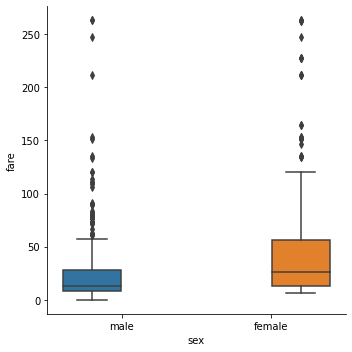

In [88]:
sns.catplot(x ='sex', y='fare', hue='sex', data=clean_ks, kind='box')